In [9]:
################ ANOTHER ##################
# DUMMY VARIABLE , LABEL ENCODER

In [10]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\LGD_DATA.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.shape)

(15290, 7)


In [11]:
# df.head()

# df.describe()



In [12]:
# CREATE CATEGORY ARTIFICIALLY - JUST FOR EXAMPLE

import numpy as np
# Categorise Rating to Binary  - 1 or 0
df['RatingScore'] = np.where(df['Losses in Thousands']>=350, 1, 0)
print(df.head())

    Ac_No  Age  Years of Experience  Number of Vehicles Gender  Married  \
0  150024   24                    5                   1      M  Married   
1  144880   31                   10                   1      F   Single   
2  133742   56                   37                   1      M  Married   
3  151282   52                   31                   1      F  Married   
4  174407   20                    3                   1      M   Single   

   Losses in Thousands  RatingScore  
0           203.319595            0  
1           402.197302            1  
2           553.132096            1  
3           292.430579            0  
4           246.540576            0  


In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, 4] = labelencoder.fit_transform(df.iloc[:, 4])
df.iloc[:, 5] = labelencoder.fit_transform(df.iloc[:, 5])

In [14]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,RatingScore
0,150024,24,5,1,1,0,203.319595,0
1,144880,31,10,1,0,1,402.197302,1
2,133742,56,37,1,1,0,553.132096,1
3,151282,52,31,1,0,0,292.430579,0
4,174407,20,3,1,1,1,246.540576,0


In [15]:
dfInput = df.iloc[:,2:6] # 0  is not required
dfoutput = df.iloc[:,-1]

In [16]:
split = int(0.8*len(df))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]
model = LogisticRegression()
print(model)

LogisticRegression()


In [18]:
from sklearn import preprocessing
from sklearn import utils

model = model.fit(X_train,Y_train )
ms = model.score(X_train,Y_train)
print("model score::",ms)

probability = model.predict_proba(X_test)
#print(probability)
#print("*" * 100)
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

model score:: 0.6999672988881622
Confusion Matrix
[[1022  463]
 [ 452 1121]]


In [19]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1485
           1       0.71      0.71      0.71      1573

    accuracy                           0.70      3058
   macro avg       0.70      0.70      0.70      3058
weighted avg       0.70      0.70      0.70      3058



0.7761216744687819


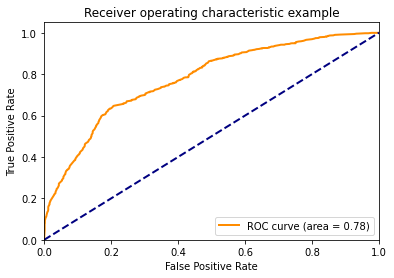

In [20]:
from sklearn import metrics
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
fpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [22]:
## OLD TECHNIQUE

# pd.get_dummies allows to convert a categorical variable into dummy variables
# Create a set of dummy variables from the sex variable
df = pd.read_csv("C:\\Users\\radha\\Desktop\\dsp27 Class\\LGD_DATA.csv")
df_Gender = pd.get_dummies(df['Gender'])
df_Married = pd.get_dummies(df['Married'])
# Join the dummy variables to the main dataframe
df_new = pd.concat([df, df_Gender], axis=1)
df_new = pd.concat([df_new, df_Married], axis=1)         
df_new

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,F,M,Married,Single
0,150024,24,5,1,M,Married,203.319595,0,1,1,0
1,144880,31,10,1,F,Single,402.197302,1,0,0,1
2,133742,56,37,1,M,Married,553.132096,0,1,1,0
3,151282,52,31,1,F,Married,292.430579,1,0,1,0
4,174407,20,3,1,M,Single,246.540576,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
15285,189499,61,43,4,F,Single,58.426429,1,0,0,1
15286,142111,69,48,4,F,Married,304.519134,1,0,1,0
15287,176444,69,51,4,F,Married,282.149148,1,0,1,0
15288,180420,22,4,4,M,Married,822.470554,0,1,1,0


In [23]:
dfClean = df_new[['Age','Number of Vehicles','F','Single','Losses in Thousands']].copy()
print(dfClean.head(5))

   Age  Number of Vehicles  F  Single  Losses in Thousands
0   24                   1  0       0           203.319595
1   31                   1  1       1           402.197302
2   56                   1  0       0           553.132096
3   52                   1  1       0           292.430579
4   20                   1  0       1           246.540576


In [24]:
dfClean = dfClean.rename(columns={'Number of Vehicles': 'nVeh', 'Losses in Thousands': 'LTh'})
print(dfClean.head(5)) 

   Age  nVeh  F  Single         LTh
0   24     1  0       0  203.319595
1   31     1  1       1  402.197302
2   56     1  0       0  553.132096
3   52     1  1       0  292.430579
4   20     1  0       1  246.540576


In [25]:
# REST SAME STEPS